In [1]:
import pandas as pd
import datetime
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Import Data

In [2]:
conn = sqlite3.connect('../data/crime_census_weather_test.db')

df = pd.read_sql('''select * from crime_census_weather;''', conn)
df.head()

conn.close()

## Exploratory Data Analysis

### Missing Values

We can see that some variables have considerable missing data, with census variables missing almost half the time. If that data is going to be tested in the models, then it usually cannot be missing.

In [3]:
df.columns

Index(['level_0', 'BLOCK_GROUP', 'year', 'month', 'tod', 'offensegroup',
       'apparent_temp', 'cloud_cover', 'dew_point', 'humidity',
       'percip_intensity', 'percip_probability', 'pressure', 'temperature',
       'uv_index', 'visibility', 'wind_bearing', 'wind_gust', 'wind_speed',
       'index', 'TotalPop', 'TPopMargin', 'UnWgtSampleCtPop',
       'PerCapitaIncome', 'PerCapIncMargin', 'MedianHouseholdInc',
       'MedHouseholdIncMargin', 'MedianAge', 'MedianAgeMargin', 'HousingUnits',
       'HousingUnitsMargin', 'UnweightedSampleHousingUnits', 'State', 'County',
       'Tract', 'BlockGroup', 'census_year'],
      dtype='object')

In [4]:
null_summary = (df.isnull().sum() / df.shape[0])*100
null_summary.sort_values(ascending=False, inplace=True)

print(null_summary)

census_year                     50.663877
MedianAge                       50.663877
BlockGroup                      50.663877
TotalPop                        50.663877
TPopMargin                      50.663877
UnWgtSampleCtPop                50.663877
PerCapIncMargin                 50.663877
MedianHouseholdInc              50.663877
MedHouseholdIncMargin           50.663877
PerCapitaIncome                 50.663877
MedianAgeMargin                 50.663877
HousingUnits                    50.663877
HousingUnitsMargin              50.663877
UnweightedSampleHousingUnits    50.663877
State                           50.663877
County                          50.663877
Tract                           50.663877
wind_bearing                     3.724005
wind_gust                        0.077776
percip_intensity                 0.031481
percip_probability               0.031481
visibility                       0.029629
cloud_cover                      0.029629
dew_point                        0

Let's try to see this data by year, in particular, the Census data and the temperature data. Notice Year is missing for a few observations, in particular, I think, when START_DATE was not usable.

In [5]:
year_list = list(df.loc[df['year'] != '', 'year'].sort_values().unique())

In [6]:
df_t = pd.DataFrame()

for year in year_list:
    year_df = df.loc[df['year'] == year]
    
    null_s = year_df.isnull().sum() / year_df.shape[0]
    
    null_s_df = pd.DataFrame(null_s).transpose()
    
    null_s_df['year'] = year
    
    df_t = df_t.append(null_s_df, ignore_index=True, sort=True)

Notice that Census Data is only completely populated for years 2013 - 2017, which is not surprising. 2009 data found for about a third of the time. If Census data is to be tested, the the years 2008, 2010--2012, and 2018 will need to be ignored.

In [7]:
df_t.loc[:, ['year','census_year']].sort_values(by=['year'])

,year,census_year
0,1974,1.000000
1,1980,1.000000
2,1981,1.000000
3,1985,1.000000
4,1991,1.000000
5,1993,1.000000
6,1997,1.000000
7,1999,1.000000
8,2000,1.000000
9,2001,1.000000


Temperature was obtained based on the crime data's date/time, so it should be missing very infrequently.

In [8]:
df_t.loc[:, ['year','temperature']].sort_values(by=['year'])

,year,temperature
0,1974,0.000000
1,1980,0.000000
2,1981,1.000000
3,1985,0.000000
4,1991,1.000000
5,1993,1.000000
6,1997,0.000000
7,1999,0.000000
8,2000,0.000000
9,2001,0.000000


## Plots

(array([4.4013e+04, 7.9680e+03, 0.0000e+00, 1.5480e+03, 0.0000e+00,
        3.7500e+02, 0.0000e+00, 7.0000e+01, 0.0000e+00, 1.9000e+01,
        6.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 1.  ,  1.55,  2.1 ,  2.65,  3.2 ,  3.75,  4.3 ,  4.85,  5.4 ,
         5.95,  6.5 ,  7.05,  7.6 ,  8.15,  8.7 ,  9.25,  9.8 , 10.35,
        10.9 , 11.45, 12.  ]),
 <a list of 20 Patch objects>)

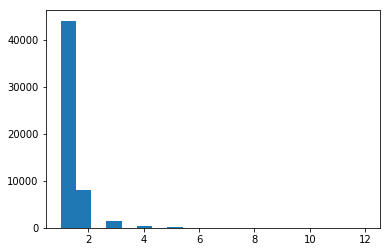

In [9]:
plt.hist(df['offensegroup'], bins=20)

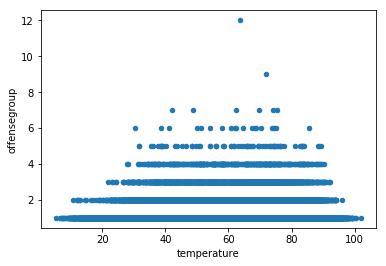

In [11]:
df.plot(kind='scatter', x='temperature',y='offensegroup')

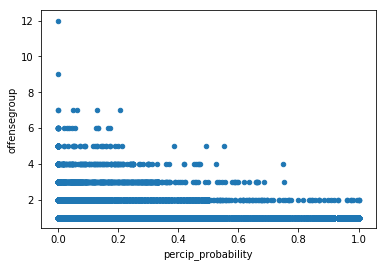

In [12]:
df.plot(kind='scatter', x='percip_probability',y='offensegroup')

In [13]:
cols = ['offensegroup', 'apparent_temp', 'cloud_cover', 'dew_point', 'humidity',
       'percip_intensity', 'percip_probability', 'pressure', 'temperature']

'''
       'index', 'TotalPop', 'TPopMargin', 'UnWgtSampleCtPop',
       'PerCapitaIncome', 'PerCapIncMargin', 'MedianHouseholdInc',
       'MedHouseholdIncMargin', 'MedianAge', 'MedianAgeMargin', 'HousingUnits',
       'HousingUnitsMargin', 'UnweightedSampleHousingUnits']
'''
pp = df[cols]

C:\Users\Barbieri\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Barbieri\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


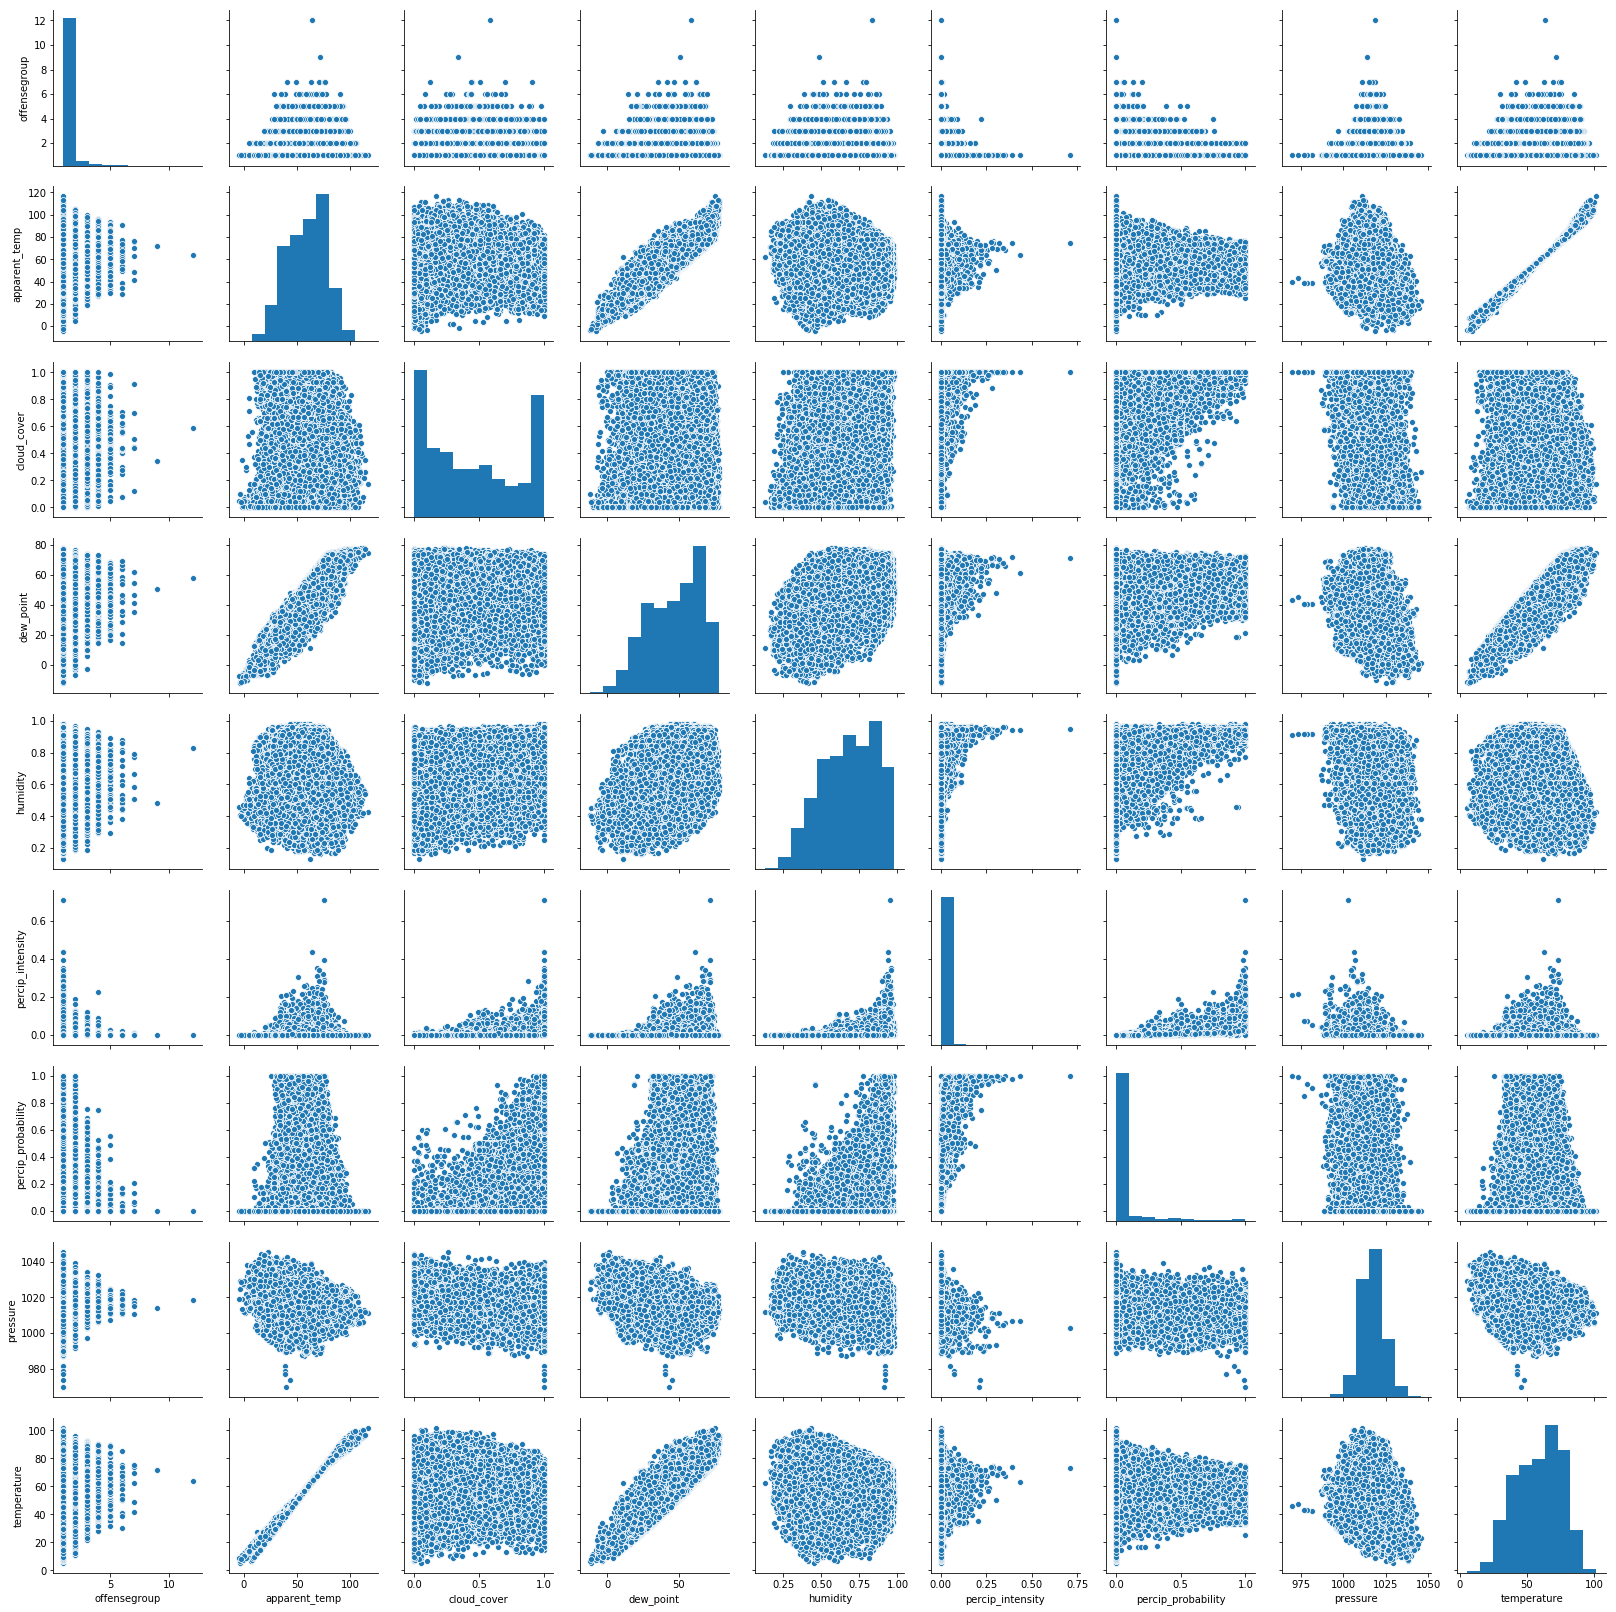

In [14]:
sns.pairplot(pp)